# Plot outliers
Read the residual file and plot the outliers

In [30]:
import os
import glob
import netCDF4
import logging
import numpy as np
import emodnetchemistry
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
coast = cfeature.GSHHSFeature(scale="i")
datacrs = ccrs.PlateCarree()
from importlib import reload
reload(emodnetchemistry)
plt.style.use("./EMODnet.mplstyle")

domain = [-45., 70., 24., 83.]
localproj2 = ccrs.LambertAzimuthalEqualArea(central_longitude=0.5 * (domain[0] + domain[1]),
                                            central_latitude=0.5 * (domain[2] + domain[3]), 
                                            false_easting=0.0, 
                                            false_northing=0.0, globe=None)

NameError: name 'domain' is not defined

In [2]:
datamaindir = "/home/ctroupin/data/EMODnet-Chemistry/Eutrophication2024/Case/"

Water_body_dissolved_inorganic_nitrogen
25.55691
1013


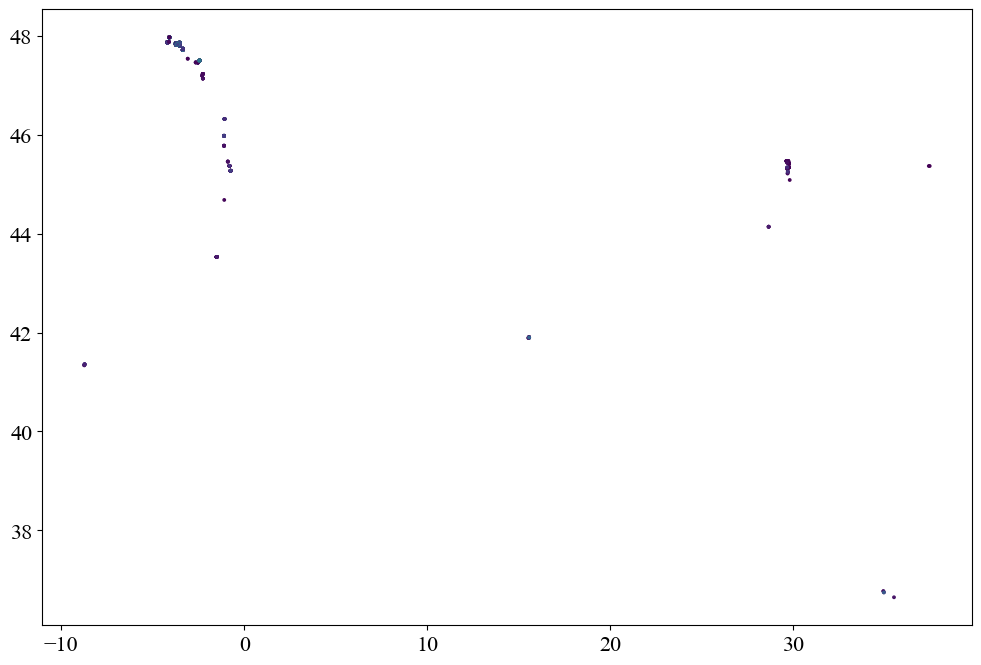

Water_body_chlorophyll-a
1.3194125
25833


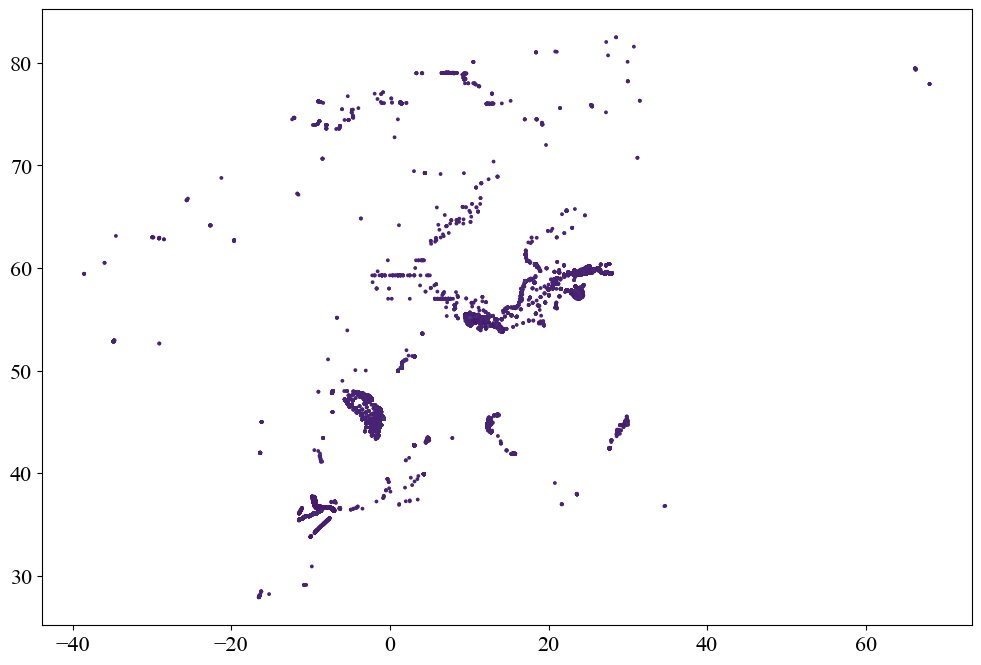

Water_body_silicate
19.255135
4936


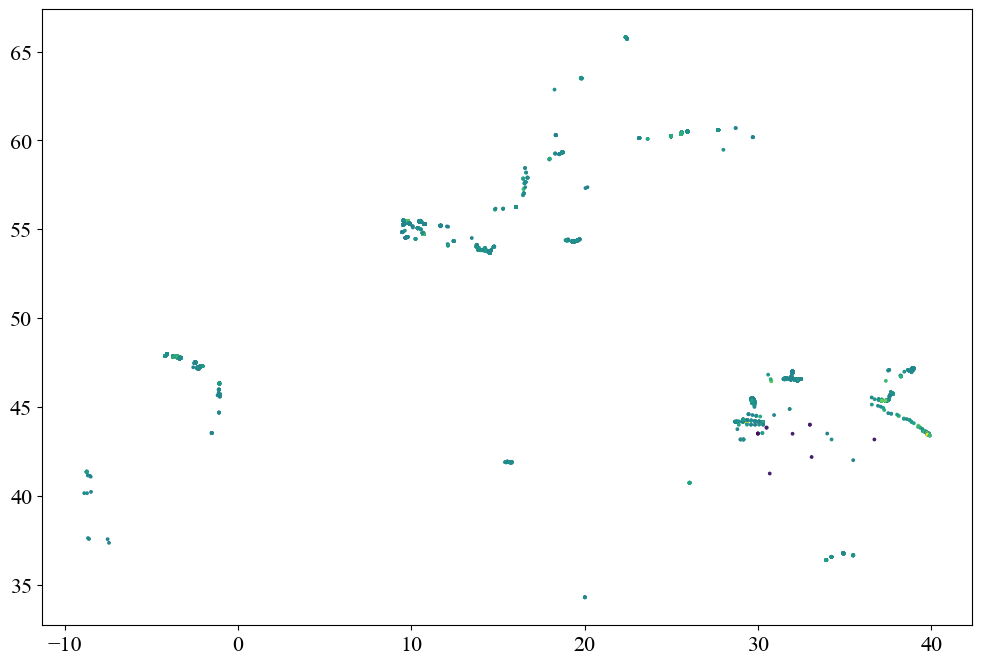

Water_body_dissolved_oxygen_concentration
65.53371
246


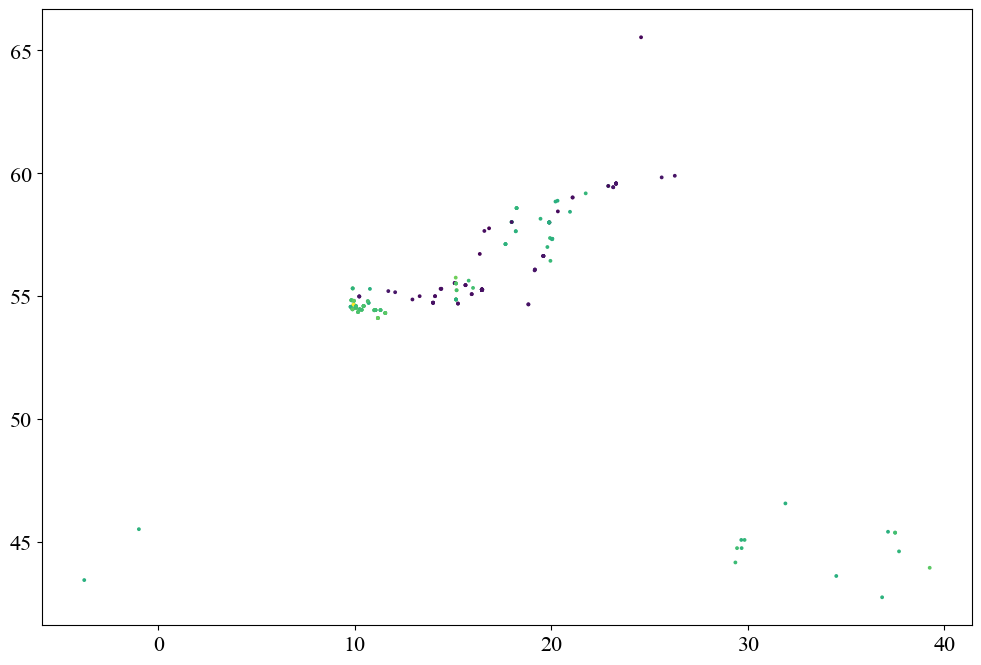

Water_body_phosphate
1.0406706
1494


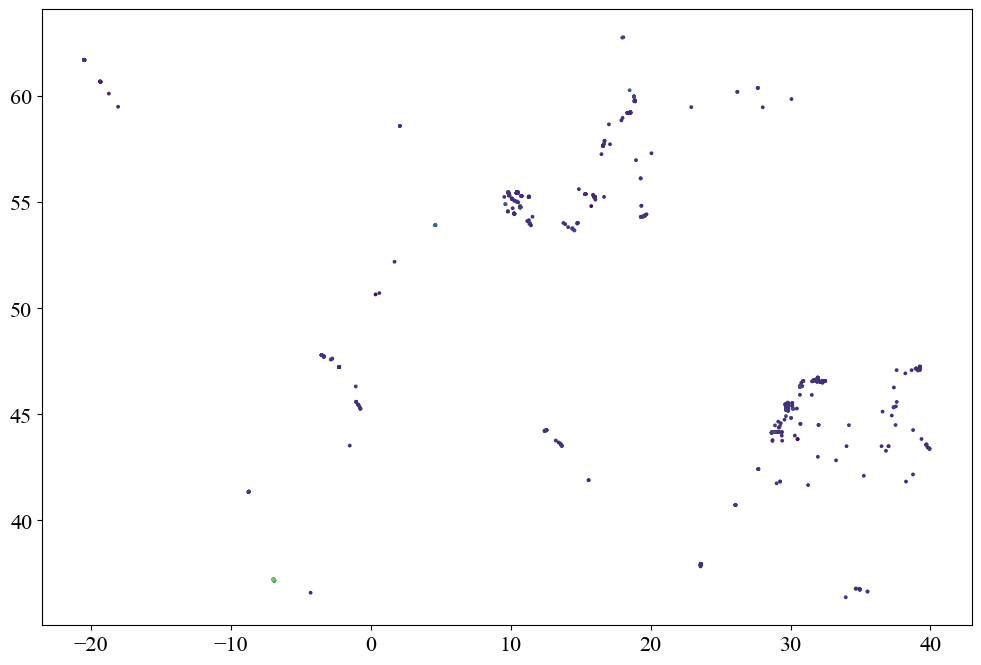

Water_body_silicate
19.325632
2833


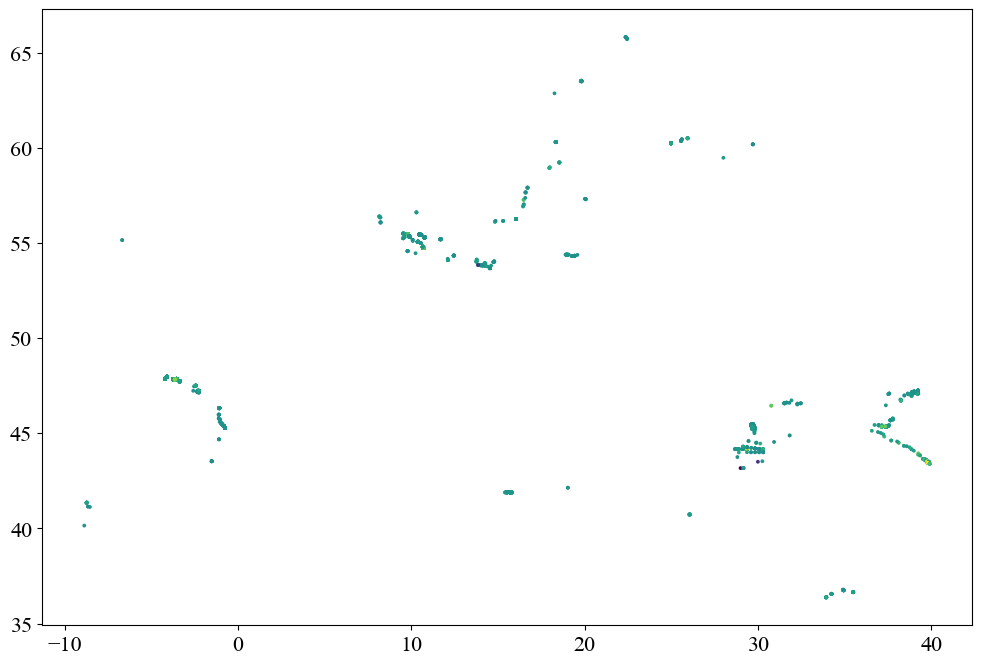

Water_body_ammonium
6.5282645
822


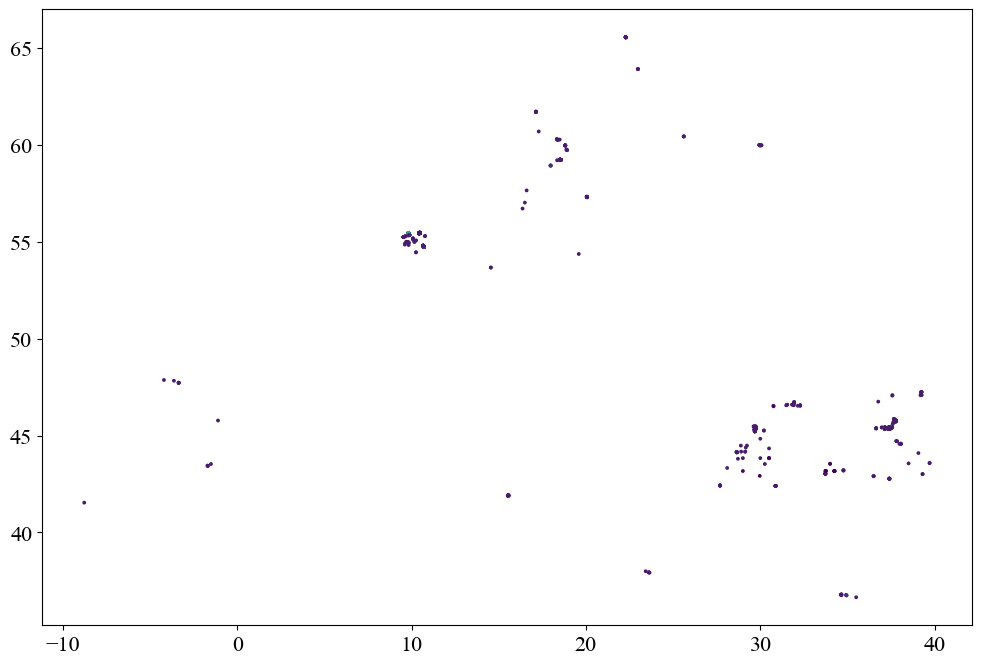

In [29]:
monthlydir = glob.glob(os.path.join(datamaindir, "*monthly"))
for datadir in monthlydir:
    residualfile = glob.glob(os.path.join(datadir, "Results/*_monthly_residuals.nc"))
    if len(residualfile) == 1:
        # Load the residuals
        with netCDF4.Dataset(residualfile[0], "r") as df:
            varlist = df.variables.keys() 
            varname = list(varlist)[-2]
            varname_res = list(varlist)[-1]
            residuals = df.variables[varname_res][:]
            obsval = df.variables[varname][:]
            
            print(varname)
            print(np.std(obsval))
            suspectvalues = np.where(np.abs(residuals) >= 5. * np.std(obsval))[0]
            print(len(suspectvalues))

            fig = plt.figure()
            ax = plt.subplot(111, projection=localproj2)
            ax.scatter(df.variables["obslon"][suspectvalues], df.variables["obslat"][suspectvalues], s=3,
                        c=residuals[suspectvalues], transform=ccrs.P)
            plt.show()